In [6]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.externals import joblib

In [7]:
df = pd.read_csv("/home/exoper/Downloads/1.csv")
df.head()

,Contour Area,Mean,Blinking,Voice,Music
0,NaN,NaN,NaN,NaN,NaN
1,335.0,NaN,0.0,0.0,5.0
2,NaN,NaN,NaN,NaN,NaN
3,335.0,73.08525,1.0,0.0,3.0
4,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 5 columns):
Contour Area    2044 non-null float64
Mean            2043 non-null float64
Blinking        2044 non-null float64
Voice           2044 non-null float64
Music           2044 non-null float64
dtypes: float64(5)
memory usage: 159.8 KB


In [9]:
data = df.dropna()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 3 to 4087
Data columns (total 5 columns):
Contour Area    2043 non-null float64
Mean            2043 non-null float64
Blinking        2043 non-null float64
Voice           2043 non-null float64
Music           2043 non-null float64
dtypes: float64(5)
memory usage: 95.8 KB


,Contour Area,Mean,Blinking,Voice,Music
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,347.994126,27.556291,0.496329,0.511992,4.931473
std,33.568497,6.163387,0.500109,0.499979,3.168807
min,304.000000,24.362080,0.000000,0.000000,0.000000
25%,335.000000,24.904857,0.000000,0.000000,2.000000
50%,335.000000,26.162346,0.000000,1.000000,5.000000
75%,370.000000,28.784579,1.000000,1.000000,8.000000
max,399.000000,118.064270,1.000000,1.000000,10.000000


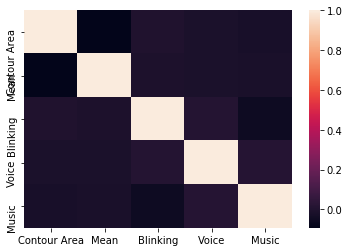

In [10]:
plt.figure()
sns.heatmap(data.corr())

In [11]:
input_cols = ['Contour Area','Mean','Blinking','Voice']
out_cols = ['Music']
X = data[input_cols]
y = data[out_cols]

#X.head()
print( X.shape, y.shape)

(2043, 4) (2043, 1)


In [12]:
data = data.reset_index(drop=True)

In [13]:
split = int(0.9 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [15]:
DT = DecisionTreeClassifier()
DT.fit(X[:split], y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
DT.score(X[split:], y[split:])
from sklearn.metrics import mean_squared_error


In [17]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X[:split], y[:split])
preds = rf.predict(X[split:])
rf.score(X[split:], y[split:])
rmse = np.sqrt(mean_squared_error(y[split:], preds))
print(rmse)

/home/exoper/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


4.343203268803608


In [18]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import pickle

In [19]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [21]:
X_train.head

<bound method NDFrame.head of       Contour Area       Mean  Blinking  Voice
1827         335.0  27.998821       0.0    0.0
2791         335.0  24.544655       0.0    0.0
1167         342.5  29.545410       1.0    0.0
2155         335.0  25.749111       1.0    1.0
2809         335.0  24.568546       0.0    1.0
2559         304.0  24.938248       0.0    0.0
1647         335.0  27.973473       1.0    0.0
3973         304.0  24.991415       1.0    1.0
3543         335.0  24.830734       0.0    1.0
2743         335.0  24.369600       1.0    0.0
315          374.0  31.151846       0.0    0.0
2047         335.0  26.574038       0.0    1.0
3487         399.0  24.768072       1.0    0.0
3983         304.0  25.023860       1.0    1.0
1817         335.0  28.069735       0.0    1.0
3711         335.0  25.071920       0.0    1.0
1419         368.0  28.591593       0.0    0.0
3321         304.0  25.030085       1.0    1.0
641          399.0  27.403910       1.0    0.0
643          335.0  27.527950 

In [22]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [23]:
xg_reg.fit(X_train,y_train)
filename = 'finalized_model.sav'
pickle.dump(xg_reg, open(filename, 'wb'))
preds = xg_reg.predict(X_test)
yt = np.asarray(y_test)


/home/exoper/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exoper/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/exoper/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
# +

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print(preds)
yt1 = np.reshape(yt,(409,))
acc = 100.0 *(preds == yt1).sum()/preds.shape
xg_reg.score(X_test,y_test)

RMSE: 4.372899
[ 2.  6.  2.  1.  8.  7.  2.  5.  2.  0.  2.  8.  2.  2.  9.  1.  2.  5.
  1.  1.  1.  6.  2.  2.  7.  2.  2.  2.  7.  7.  5.  6.  2.  2. 10.  1.
  7.  1.  6.  2.  2.  6.  1.  2.  0.  6.  7.  2.  1.  9.  1.  1.  2.  6.
  9.  7.  6.  6.  8.  2.  2.  6.  6.  3.  7.  1.  1.  7.  1.  2.  6.  3.
  1.  0.  2.  2.  2.  2.  2.  6.  0. 10.  1.  5.  7.  0.  2.  6.  2.  6.
  2.  2.  6.  6.  7.  5.  2.  1. 10.  2.  0.  1.  2.  1.  9.  7.  6.  2.
  2.  6.  2.  2.  4.  2.  2.  5.  2.  4.  1.  3.  6.  1.  2.  3.  7. 10.
 10.  1.  5.  2.  8.  7.  2.  7.  6.  6.  5.  7.  1.  5.  7.  1.  2.  2.
  1.  6.  6.  2.  5.  2.  2.  3.  2.  2.  5.  0.  2.  7.  2.  7.  1.  2.
  2.  9.  5.  2.  2.  6.  7.  2.  4.  1.  6.  2.  1.  1. 10.  2.  2.  6.
  2.  5.  2.  7.  1.  6.  1.  2.  2.  2.  0.  6.  6.  6.  2.  2.  2.  1.
  1.  4.  2.  7.  8.  2.  1.  6.  4.  2.  7.  2.  6.  1.  7.  6.  4.  2.
  3.  6.  0.  8.  3.  1.  6.  1.  7.  2.  6.  7.  4.  1.  7.  2.  1.  1.
  6.  6.  2.  1.  1.  2. 10.  5.  2.

/home/exoper/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.08557457212713937

In [65]:
import pickle
X_test

,Contour Area,Mean,Blinking,Voice
3747,335.0,25.028284,1.0,1.0
2855,306.0,24.665977,0.0,1.0
3467,368.0,24.764738,0.0,0.0
2113,304.0,25.853980,0.0,1.0
2485,335.0,24.553060,0.0,1.0
2843,399.0,24.596428,0.0,1.0
2979,368.0,24.889097,1.0,0.0
549,368.0,26.019108,0.0,0.0
2197,335.0,25.530132,1.0,0.0
219,335.0,31.366016,0.0,1.0


In [27]:
filename = '/home/exoper/Downloads/Perceptron_Summer_II_2018-master/class_03/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [93]:
l = [[355.0,26.7,1.0,1.0]]
#df = pd.DataFrame({'Contour Area':l[:1]})#result = (loaded_model.predict([355.0,27.77,1.0,1.0]))
new_df = pd.DataFrame(columns=['Contour Area', 'Mean','Blinking','Voice'], data=l)
result = loaded_model.predict(new_df)
print(result)

[2.]


/home/exoper/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [109]:
import nltk
from nltk.tokenize import word_tokenize
  
# Step 1 – Training data
train = [("Great place to be when you are in Bangalore.", "pos"),
  ("The place was being renovated when I visited so the seating was limited.", "neg"),
  ("Loved the ambience, loved the food", "pos"),
  ("The food is delicious but not over the top.", "neg"),
  ("Service - Little slow, probably because too many people.", "neg"),
  ("The place is not easy to locate", "neg"),
  ("Mushroom fried rice was spicy", "pos"),
  ("I am feeling worse" , "neg"),
  ("I am feeling good","pos")
]
  
# Step 2 
dictionary = set(word.lower() for passage in train for word in word_tokenize(passage[0]))
  
# Step 3
t = [({word: (word in word_tokenize(x[0])) for word in dictionary}, x[1]) for x in train]
  
# Step 4 – the classifier is trained with sample data
classifier = nltk.NaiveBayesClassifier.train(t)
  
test_data = "I am bad"
test_data_features = {word.lower(): (word in word_tokenize(test_data.lower())) for word in dictionary}
  
print (classifier.classify(test_data_features))

pos


In [111]:
import spacy
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.